# 8 steps of Machine Learning
1. Data gathering
2. data preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature engineering/selection
5. Training model
6. Test model/Model evaluation
7. Hyper Parameter tuning
8. Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data gathering

In [ ]:
data=pd.read_csv('FuelConsumption.csv')
data.head()

Check the basic info and missing values

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
# Return DataFrame with duplicate rows removed.
data.drop_duplicates(inplace=True)

In [ ]:
# count categorical unique value from make column
data['MAKE'].value_counts()
data.MAKE.value_counts()

In [ ]:
# count categorical unique value from MODEL column
data['MODEL'].value_counts()

In [ ]:
# count categorical unique value from VEHICLECLASS column
data['VEHICLECLASS'].value_counts()

In [ ]:
# count categorical unique value from TRANSMISSION  column
data['TRANSMISSION'].value_counts()

In [9]:
data['FUELTYPE'].unique() # getting the name of unique value

array(['Z', 'D', 'X', 'E'], dtype=object)

In [10]:
# count categorical unique value from FUELTYPE  column
data['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [11]:
data['MODELYEAR'].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [ ]:
# drop MODELYEAR COLUMN
data.drop(columns=['MODELYEAR'], inplace=True)

Statistical Analysis

In [ ]:
data.describe().T

# 2. Data preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
# each column transform categorical to numerical value and  update to dataframe
for col in ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']:
    data[col]=encoder.fit_transform(data[col]) 

In [ ]:
data

# 3. EDA

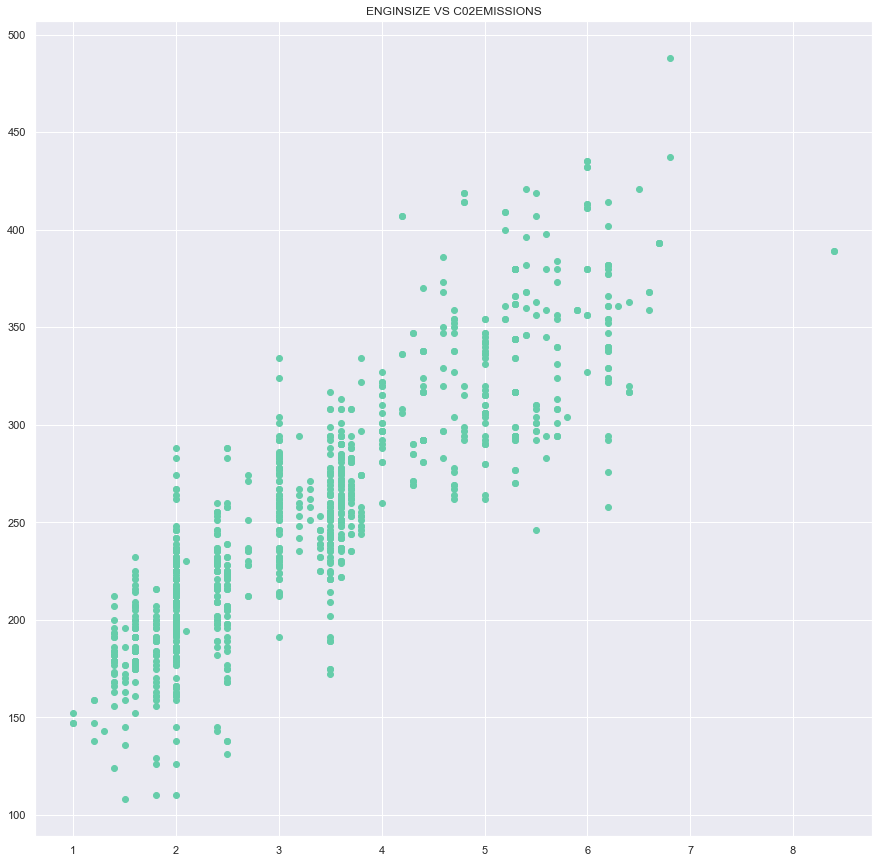

In [16]:
sns.set(style='dark')
plt.figure(figsize=(15,15))
plt.grid()
plt.scatter(x=data['ENGINESIZE'],y=data['CO2EMISSIONS'],color='MediumAquamarine')
plt.title('ENGINSIZE VS C02EMISSIONS')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=data)
plt.title('ENGINESIZE VE CO2EMISSIONS')
plt.show()

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ENGINESIZE', ylabel='Frequency'>

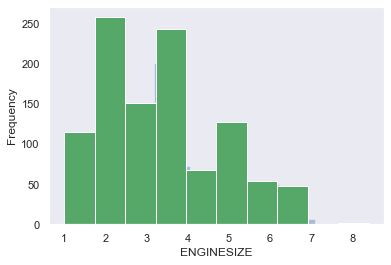

In [17]:
sns.distplot(data.ENGINESIZE,kde=False)
data['ENGINESIZE'].plot(kind='hist') # hist/bar
data.ENGINESIZE.plot(kind='hist') # by this plot we can know the distribution of data over x axis

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data)

In [ ]:
sns.boxenplot(data=data, x='ENGINESIZE', )

# 4. Feature Engineering/Selection

Finding important features

In [18]:
correlation=data.corr()
correlation

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAKE,NaN,1.000000,0.039068,0.005853,-0.166416,-0.203427,0.193264,0.015051,-0.246247,-0.174665,-0.222273,0.226347,-0.186504
MODEL,NaN,0.039068,1.000000,0.244648,0.096304,0.080010,-0.002004,-0.051902,0.147394,0.182009,0.161373,-0.148806,0.155492
VEHICLECLASS,NaN,0.005853,0.244648,1.000000,0.240529,0.208528,-0.172934,-0.083893,0.354363,0.430074,0.384678,-0.354073,0.388468
ENGINESIZE,NaN,-0.166416,0.096304,0.240529,1.000000,0.934011,-0.272427,0.060869,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,-0.203427,0.080010,0.208528,0.934011,1.000000,-0.246456,0.127959,0.796473,0.724594,0.776788,-0.770430,0.849685
TRANSMISSION,NaN,0.193264,-0.002004,-0.172934,-0.272427,-0.246456,1.000000,0.214650,-0.350241,-0.348174,-0.352596,0.341119,-0.299393
FUELTYPE,NaN,0.015051,-0.051902,-0.083893,0.060869,0.127959,0.214650,1.000000,-0.128841,-0.178439,-0.148167,0.007106,0.075167
FUELCONSUMPTION_CITY,NaN,-0.246247,0.147394,0.354363,0.832225,0.796473,-0.350241,-0.128841,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,-0.174665,0.182009,0.430074,0.778746,0.724594,-0.348174,-0.178439,0.965718,1.000000,0.985804,-0.893809,0.861748


<AxesSubplot:>

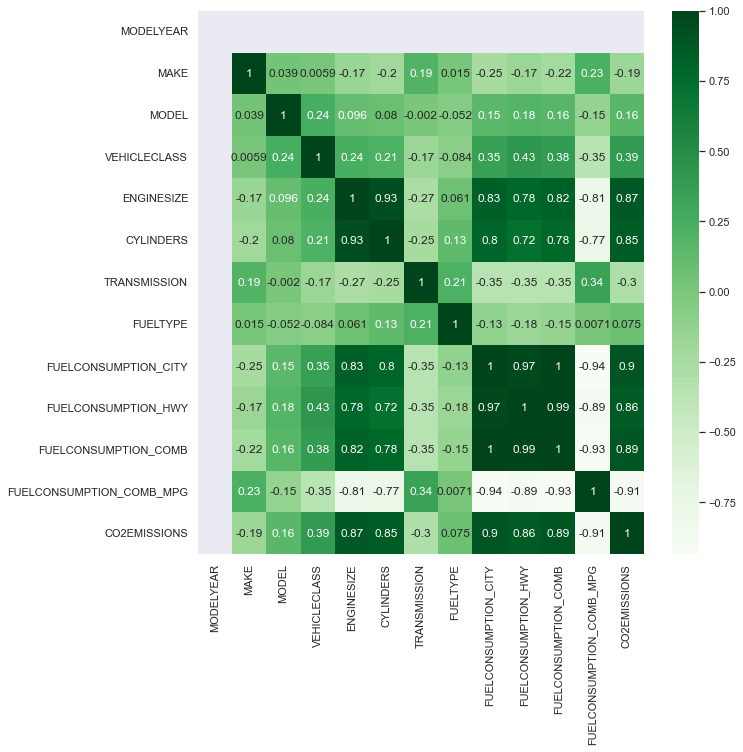

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [20]:
# Droping unnecessary ffeatures/column
data.drop(columns=['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION',
          'FUELTYPE', 'FUELCONSUMPTION_COMB_MPG'], inplace=True)

<AxesSubplot:>

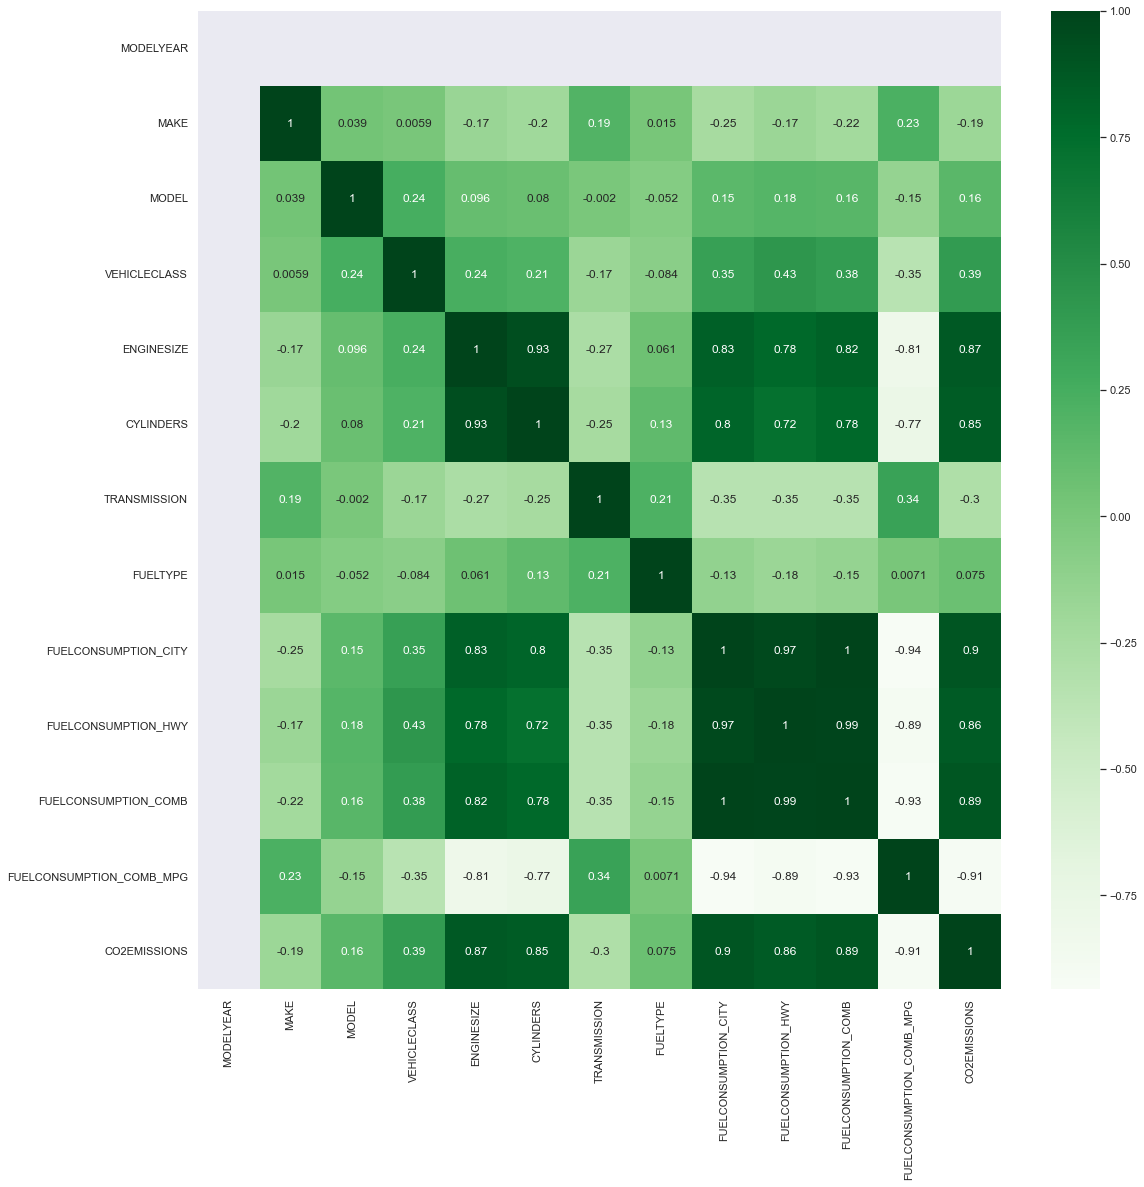

In [23]:
plt.figure(figsize=(18,18))
sns.heatmap(correlation, annot=True,cmap='Greens')

In [ ]:
data

Detect Quartile and remove

In [24]:
Q1=np.percentile(data.ENGINESIZE, 25, method='midpoint')
Q1

2.0

In [25]:
Q3=np.percentile(data.ENGINESIZE, 75, method='midpoint')
Q3

4.3

In [26]:
iQR=Q3-Q1
iQR

2.3

In [27]:
Q3+1.5*iQR

7.75

In [28]:
Q1-1.5*iQR

-1.4499999999999997

In [29]:
Outliers_index_upper=np.where(data['ENGINESIZE']>Q3+1.5*iQR)
Outliers_index_upper[0]

array([940, 941], dtype=int64)

In [30]:
Outliers_index_lower=np.where(data['ENGINESIZE']<Q1-1.5*iQR)
Outliers_index_lower[0]

array([], dtype=int64)

In [31]:
# Droping Outliers_index
data.drop(Outliers_index_upper[0], inplace=True)

In [ ]:
data

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENGINESIZE'>

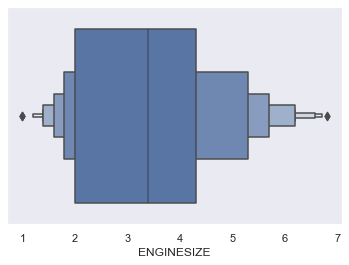

In [32]:
sns.boxenplot(data['ENGINESIZE'])

# 5. Training model

Train & test split

In [33]:
from sklearn.model_selection import train_test_split

When ues a single feature for modeling then we called simple linear Regression,
on the other hand when use one features for modeling then called multipul linear Regression

In [34]:
# simple linear rgression
train_features, test_features, train_target, test_target = train_test_split(
    data[['ENGINESIZE']], data[['CO2EMISSIONS']], test_size=0.2,random_state=2)


In [35]:
test_features

,ENGINESIZE
164,2.0
241,6.2
418,5.0
624,3.3
737,5.5
...,...
1066,3.2
470,5.3
272,1.4
226,4.8


In [36]:
test_features
test_target

,CO2EMISSIONS
164,232
241,324
418,264
624,271
737,301
...,...
1066,294
470,294
272,186
226,419


Modeling 

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [38]:
# training our model
model.fit(train_features,train_target)

LinearRegression()

In [39]:
# theta 0
model.intercept_ # intercept_ refers theta zero value, it will be always single value

array([123.95342108])

In [40]:
# theta 1
model.coef_ # coef_ means coefficient which refers theta one values , it may be multipul value

array([[39.32842296]])

In [41]:
test_target

,CO2EMISSIONS
164,232
241,324
418,264
624,271
737,301
...,...
1066,294
470,294
272,186
226,419


In [42]:
x=test_features.values[0] # return ENGINESIZE OF ZERO INDEX
yhat=model.intercept_ +(model.coef_*x) # mathematical calculation
yhat


array([[202.61026699]])

In [43]:
# return CO2EMISSION OF ZERO INDEX
test_target.values[0]   # .values[0]  conert Dataferm to numpy

array([232], dtype=int64)

# 6. Model testing and Evaluation

In [44]:
from sklearn.metrics import mean_squared_error, r2_score #sklearn.metrics contain all error evaluation module 

In [45]:
# mannuly Error calculations
y_hat=model.predict(test_features) # prediction
np.sum((test_target - y_hat)**2)/213


CO2EMISSIONS    846.110506
dtype: float64

In [46]:
# error calculation
mean_squared_error(test_target,y_hat) # similar with previous one

846.110505677681

In [47]:
# test accuricy
r2_score(test_target, y_hat) # or

r2_score(test_target, y_hat)*100

76.68018881543975

In [48]:
# Checking error and accurecy for single features
for features in data.columns[:-1]:
    print('__________')
    train_features, test_features, train_target, test_target = train_test_split(
    data[[features]], data[['CO2EMISSIONS']], test_size=0.2,random_state=2)

    model=LinearRegression()
    model.fit(train_features,train_target)
    y_hat=model.predict(test_features)
    print(f'ERROR OF {features}: ',mean_squared_error(test_target,y_hat))
    print(f'ACCURICY OF {features}: ',r2_score(test_target, y_hat)*100)

__________
ERROR OF MODELYEAR:  3628.3187212083144
ACCURICY OF MODELYEAR:  -0.0007764094766660179
__________
ERROR OF ENGINESIZE:  846.110505677681
ACCURICY OF ENGINESIZE:  76.68018881543975
__________
ERROR OF CYLINDERS:  954.8360959338521
ACCURICY OF CYLINDERS:  73.68358232173708
__________
ERROR OF FUELCONSUMPTION_CITY:  837.9516984894432
ACCURICY OF FUELCONSUMPTION_CITY:  76.90505523873105
__________
ERROR OF FUELCONSUMPTION_HWY:  986.6445246410474
ACCURICY OF FUELCONSUMPTION_HWY:  72.80690422052946
__________
ERROR OF FUELCONSUMPTION_COMB:  847.3274857146505
ACCURICY OF FUELCONSUMPTION_COMB:  76.6466473991743


Multiple Linear Regression

In [49]:
from itertools import combinations # module of combinations

In [50]:
# Checking error and accurecy for combine features
feature_combinations = list(combinations(['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
                            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], 3))  # 2 refers  numbers of combination
for features in feature_combinations:
    print('---------------')
    train_features, test_features, train_target, test_target = train_test_split(
        data[list(features)], data[['CO2EMISSIONS']], test_size=0.2,random_state=2)
    model=LinearRegression()
    model.fit(train_features,train_target)
    y_hat=model.predict(test_features)
    print(f'ERROR OF {features}: ',mean_squared_error(test_target,y_hat))
    print(f'ACCURICY OF {features}: ',r2_score(test_target, y_hat)*100)

---------------
ERROR OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY'):  574.6152509461183
ACCURICY OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY'):  84.16292072263103
---------------
ERROR OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY'):  545.4206073593269
ACCURICY OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY'):  84.96755979929539
---------------
ERROR OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'):  551.941563624858
ACCURICY OF ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'):  84.78783449410827
---------------
ERROR OF ('ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'):  591.1818877213174
ACCURICY OF ('ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'):  83.70632452276301
---------------
ERROR OF ('ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB'):  590.8094980945527
ACCURICY OF ('ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB'):  83.71658802348185
---------------
ERROR OF ('ENGINESIZE', 'FUELCONSUMPTION

# 7. Hyper Parameter tuning

Cross validation 

 k-fold Cross-Validation is a statistical method used to estimate the skill of machine learning models.

In [51]:
features=data.drop(columns=['CO2EMISSIONS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY'])
features

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2014,2.0,4,8.5
1,2014,2.4,4,9.6
2,2014,1.5,4,5.9
3,2014,3.5,6,11.1
4,2014,3.5,6,10.6
...,...,...,...,...
1062,2014,3.0,6,11.8
1063,2014,3.2,6,11.5
1064,2014,3.0,6,11.8
1065,2014,3.2,6,11.3


In [52]:
target=data[['CO2EMISSIONS']]
target

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [53]:
from sklearn.model_selection import KFold # module of k-fold Cross-Validation

In [ ]:
KFold? # return detail about dataset

In [54]:
# this give us indexes of training and testing dataset and using these indexes we can find out values from original dataset
folds = KFold(n_splits=10) # define the number of splits
tuple(folds.split(features,target)) # split training and testing set


((array([ 107,  108,  109,  110,  111,  112,  113,  114,  115,  116,  117,
          118,  119,  120,  121,  122,  123,  124,  125,  126,  127,  128,
          129,  130,  131,  132,  133,  134,  135,  136,  137,  138,  139,
          140,  141,  142,  143,  144,  145,  146,  147,  148,  149,  150,
          151,  152,  153,  154,  155,  156,  157,  158,  159,  160,  161,
          162,  163,  164,  165,  166,  167,  168,  169,  170,  171,  172,
          173,  174,  175,  176,  177,  178,  179,  180,  181,  182,  183,
          184,  185,  186,  187,  188,  189,  190,  191,  192,  193,  194,
          195,  196,  197,  198,  199,  200,  201,  202,  203,  204,  205,
          206,  207,  208,  209,  210,  211,  212,  213,  214,  215,  216,
          217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  227,
          228,  229,  230,  231,  232,  233,  234,  235,  236,  237,  238,
          239,  240,  241,  242,  243,  244,  245,  246,  247,  248,  249,
          250,  251,  252

In [55]:
# Checking error and accurecy all splits using k-fold Cross-Validation
scores=[]
for train_index,test_index in tuple(folds.split(features,target)):
    #fetch data
    xtrain=features.values[train_index]
    ytrain=target.values[train_index]
    xtest=features.values[test_index]
    ytest=target.values[test_index]

    # Model
    Model=LinearRegression()
    Model.fit(xtrain,ytrain)
    # Testing
    y_hat= Model.predict(xtest)
    print(f'Mean Squared Error: ',mean_squared_error(ytest,y_hat))
    print(f'R Square Error: ',r2_score(ytest, y_hat)*100)
    scores.append(r2_score(ytest, y_hat)*100)


Mean Squared Error:  349.1792914525303
R Square Error:  90.96058598041148
Mean Squared Error:  434.7012169215582
R Square Error:  85.37478166017146
Mean Squared Error:  1072.8174664588082
R Square Error:  75.47100803506828
Mean Squared Error:  910.8646152554504
R Square Error:  83.02470944678863
Mean Squared Error:  1016.3448485078856
R Square Error:  80.92419086345551
Mean Squared Error:  427.83358047957836
R Square Error:  82.89594436218545
Mean Squared Error:  462.3282805532256
R Square Error:  87.46612671769797
Mean Squared Error:  403.3304279608698
R Square Error:  89.61625125430008
Mean Squared Error:  301.6605592329414
R Square Error:  90.96293356181839
Mean Squared Error:  404.33529139633697
R Square Error:  86.32109144438134


In [ ]:
scores # return all  splits accurecy

In [56]:
scores=np.array(scores) # Checking average accurecy
scores.mean()

85.30176233262786

In [57]:
# Another away of cross validation
from sklearn.model_selection import cross_val_score
Mode1_1=LinearRegression()
cross_value=cross_val_score(Mode1_1,features,target, cv=10) # cv=10 means number of split 
cross_value*100

array([90.96058598, 85.37478166, 75.47100804, 83.02470945, 80.92419086,
       82.89594436, 87.46612672, 89.61625125, 90.96293356, 86.32109144])

In [58]:
cross_value.mean()*100 # Checking average accurecy

85.30176233262785

In [59]:
# Checking mean_squared_error
from sklearn.model_selection import cross_val_score
Mode1_1=LinearRegression()
cross_value_MSE=cross_val_score(Mode1_1,features,target, cv=10, scoring='neg_mean_squared_error') # cv=10 means number of split 
cross_value_MSE

array([ -349.17929145,  -434.70121692, -1072.81746646,  -910.86461526,
       -1016.34484851,  -427.83358048,  -462.32828055,  -403.33042796,
        -301.66055923,  -404.3352914 ])

In [60]:
cross_value_MSE.mean()

-578.339557821919

# 8. Model Visualization

Visualize simple Linear Regression

In [61]:
Model_2=LinearRegression()
Model_2.fit(features[['ENGINESIZE']], target)

LinearRegression()

In [62]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1065.0,2014.000000,0.000000,2014.0,2014.0,2014.0,2014.0,2014.0
ENGINESIZE,1065.0,3.336808,1.400153,1.0,2.0,3.4,4.3,6.8
CYLINDERS,1065.0,5.786854,1.789857,3.0,4.0,6.0,8.0,12.0
FUELCONSUMPTION_COMB,1065.0,11.570892,3.481225,4.7,9.0,10.9,13.3,25.8


In [63]:
dummy_feature=np.linspace(1,7,200).reshape(-1,1) # reshape(-1,1) converting 1D to 2D array
dummy_feature
ypred=Model_2.predict(dummy_feature) 
ypred

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[163.81439263],
       [165.00355464],
       [166.19271665],
       [167.38187866],
       [168.57104067],
       [169.76020268],
       [170.94936468],
       [172.13852669],
       [173.3276887 ],
       [174.51685071],
       [175.70601272],
       [176.89517473],
       [178.08433674],
       [179.27349875],
       [180.46266076],
       [181.65182277],
       [182.84098478],
       [184.03014679],
       [185.2193088 ],
       [186.40847081],
       [187.59763282],
       [188.78679483],
       [189.97595684],
       [191.16511885],
       [192.35428086],
       [193.54344287],
       [194.73260487],
       [195.92176688],
       [197.11092889],
       [198.3000909 ],
       [199.48925291],
       [200.67841492],
       [201.86757693],
       [203.05673894],
       [204.24590095],
       [205.43506296],
       [206.62422497],
       [207.81338698],
       [209.00254899],
       [210.191711  ],
       [211.38087301],
       [212.57003502],
       [213.75919703],
       [214

In [64]:
ypred.ravel()# ravel() converting 2D to 1D array

array([163.81439263, 165.00355464, 166.19271665, 167.38187866,
       168.57104067, 169.76020268, 170.94936468, 172.13852669,
       173.3276887 , 174.51685071, 175.70601272, 176.89517473,
       178.08433674, 179.27349875, 180.46266076, 181.65182277,
       182.84098478, 184.03014679, 185.2193088 , 186.40847081,
       187.59763282, 188.78679483, 189.97595684, 191.16511885,
       192.35428086, 193.54344287, 194.73260487, 195.92176688,
       197.11092889, 198.3000909 , 199.48925291, 200.67841492,
       201.86757693, 203.05673894, 204.24590095, 205.43506296,
       206.62422497, 207.81338698, 209.00254899, 210.191711  ,
       211.38087301, 212.57003502, 213.75919703, 214.94835904,
       216.13752105, 217.32668305, 218.51584506, 219.70500707,
       220.89416908, 222.08333109, 223.2724931 , 224.46165511,
       225.65081712, 226.83997913, 228.02914114, 229.21830315,
       230.40746516, 231.59662717, 232.78578918, 233.97495119,
       235.1641132 , 236.35327521, 237.54243722, 238.73

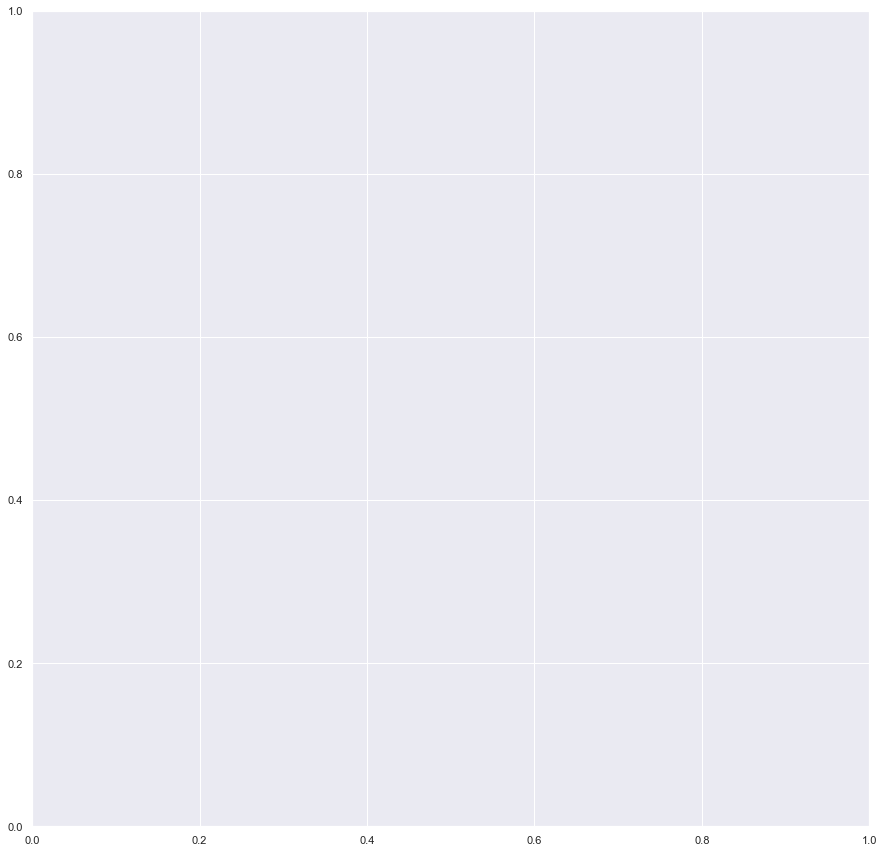

In [65]:
sns.set(style='dark')
plt.figure(figsize=(15,15))
plt.grid()

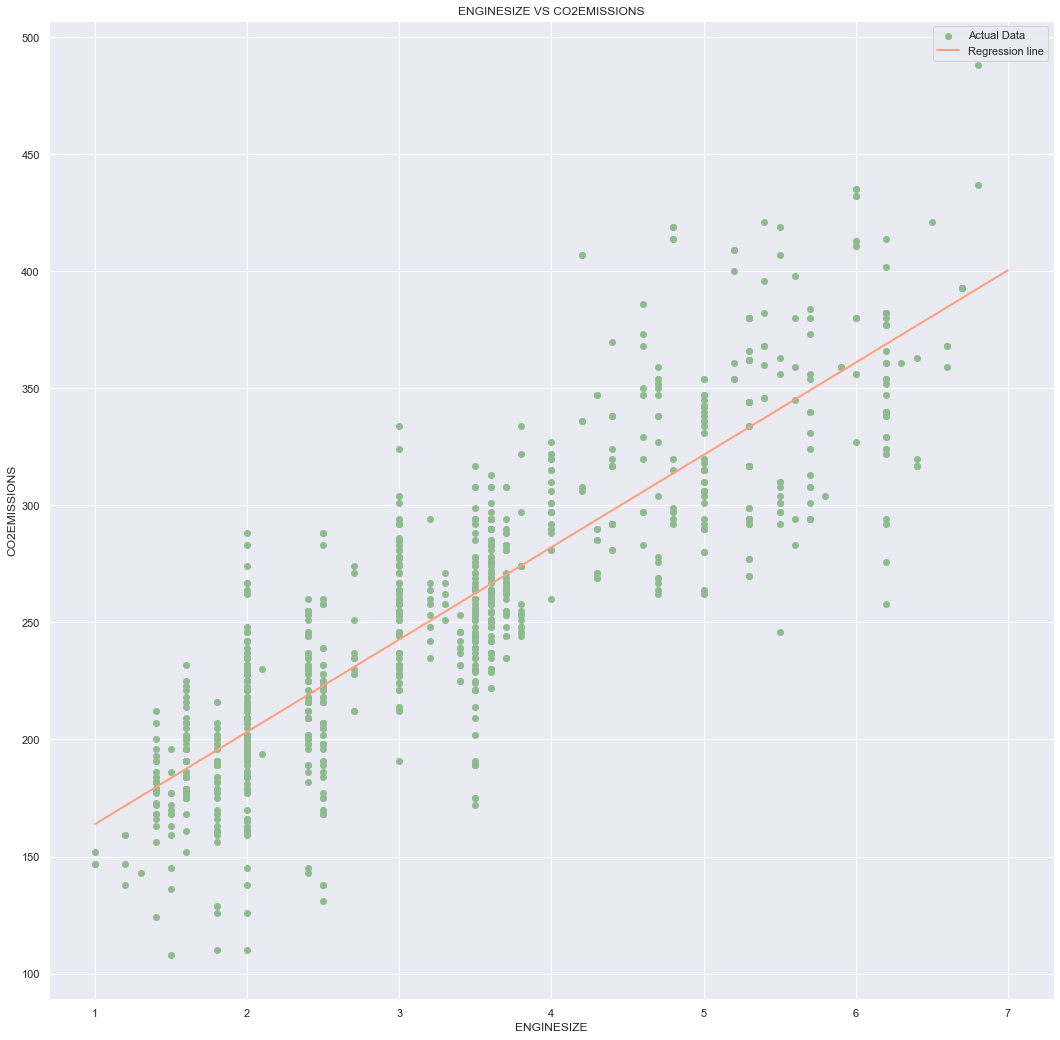

In [77]:
plt.figure(figsize=(18,18))
sns.set(style='dark')
plt.scatter(features[['ENGINESIZE']],target, label='Actual Data',color='DarkSeaGreen')
plt.plot(dummy_feature.ravel(), ypred.ravel(), label='Regression line',color='LightSalmon',linewidth=2)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE VS CO2EMISSIONS')
plt.grid()
plt.legend()
plt.show()


Visualize Multiple Linear Regression

In [85]:
Model_3=LinearRegression()
Model_3.fit(features[['ENGINESIZE','FUELCONSUMPTION_COMB']], target)

LinearRegression()

In [86]:
dummy_ENGINESIZE=np.linspace(1,5,200)
dummy_FUELCONSUMPTION_COMB=np.linspace(4.8,25.8,200)
dummy_features=np.c_[dummy_ENGINESIZE,dummy_FUELCONSUMPTION_COMB] # c_ means concatination
dummy_features

array([[ 1.        ,  4.8       ],
       [ 1.0201005 ,  4.90552764],
       [ 1.04020101,  5.01105528],
       [ 1.06030151,  5.11658291],
       [ 1.08040201,  5.22211055],
       [ 1.10050251,  5.32763819],
       [ 1.12060302,  5.43316583],
       [ 1.14070352,  5.53869347],
       [ 1.16080402,  5.64422111],
       [ 1.18090452,  5.74974874],
       [ 1.20100503,  5.85527638],
       [ 1.22110553,  5.96080402],
       [ 1.24120603,  6.06633166],
       [ 1.26130653,  6.1718593 ],
       [ 1.28140704,  6.27738693],
       [ 1.30150754,  6.38291457],
       [ 1.32160804,  6.48844221],
       [ 1.34170854,  6.59396985],
       [ 1.36180905,  6.69949749],
       [ 1.38190955,  6.80502513],
       [ 1.40201005,  6.91055276],
       [ 1.42211055,  7.0160804 ],
       [ 1.44221106,  7.12160804],
       [ 1.46231156,  7.22713568],
       [ 1.48241206,  7.33266332],
       [ 1.50251256,  7.43819095],
       [ 1.52261307,  7.54371859],
       [ 1.54271357,  7.64924623],
       [ 1.56281407,

In [87]:
ypred=Model_3.predict(dummy_features)
ypred

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[144.42455158],
       [145.84223613],
       [147.25992069],
       [148.67760525],
       [150.09528981],
       [151.51297437],
       [152.93065893],
       [154.34834349],
       [155.76602805],
       [157.18371261],
       [158.60139717],
       [160.01908173],
       [161.43676629],
       [162.85445084],
       [164.2721354 ],
       [165.68981996],
       [167.10750452],
       [168.52518908],
       [169.94287364],
       [171.3605582 ],
       [172.77824276],
       [174.19592732],
       [175.61361188],
       [177.03129644],
       [178.448981  ],
       [179.86666555],
       [181.28435011],
       [182.70203467],
       [184.11971923],
       [185.53740379],
       [186.95508835],
       [188.37277291],
       [189.79045747],
       [191.20814203],
       [192.62582659],
       [194.04351115],
       [195.46119571],
       [196.87888026],
       [198.29656482],
       [199.71424938],
       [201.13193394],
       [202.5496185 ],
       [203.96730306],
       [205

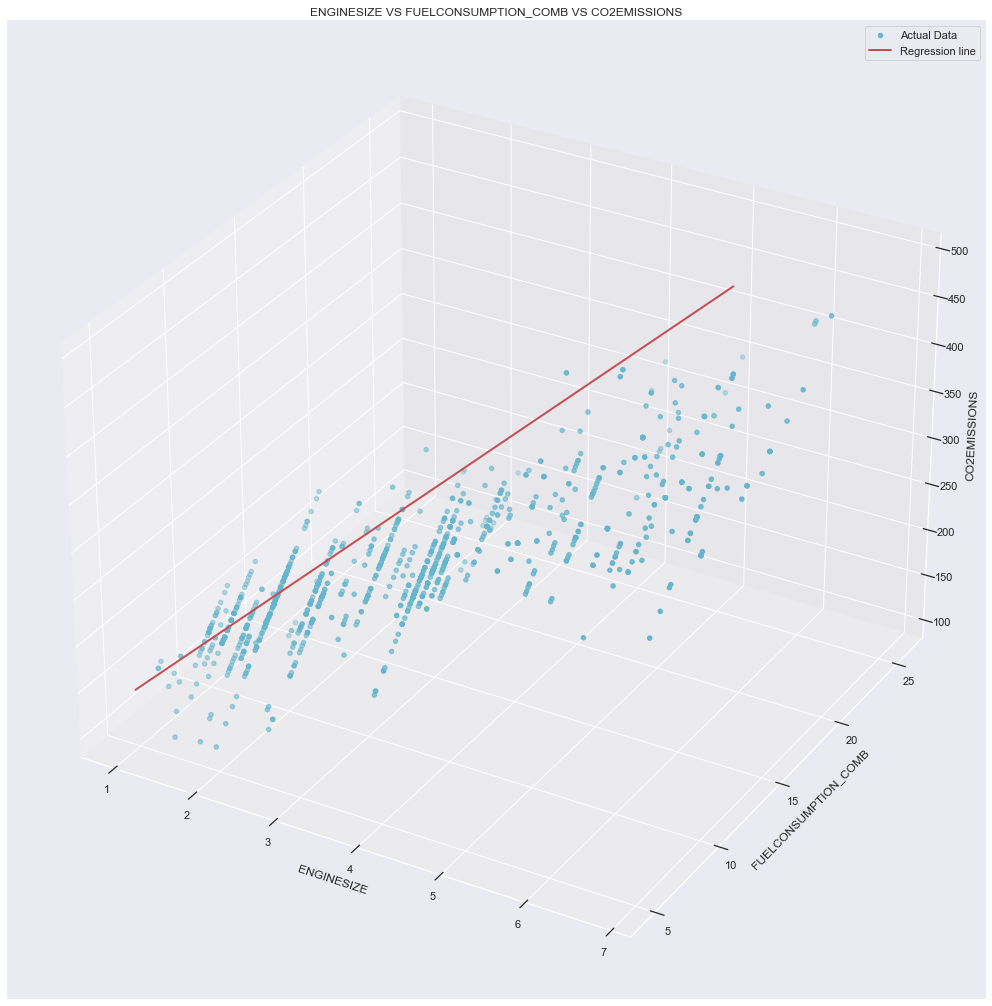

In [89]:
plt.figure(figsize=(18,18))
axes=plt.axes(projection='3d') # create 3d axes
axes.scatter3D(features['ENGINESIZE'],features['FUELCONSUMPTION_COMB'],target, label='Actual Data',color='c')

axes.plot3D(dummy_ENGINESIZE,dummy_FUELCONSUMPTION_COMB, ypred.ravel(), label='Regression line',color='r',linewidth=2)
axes.set_xlabel('ENGINESIZE')
axes.set_ylabel('FUELCONSUMPTION_COMB')
axes.set_zlabel('CO2EMISSIONS')
plt.title('ENGINESIZE VS FUELCONSUMPTION_COMB VS CO2EMISSIONS')
plt.legend()
plt.show()

In [ ]:
data.columns

In [ ]:
data.describe().T